# Import libraries

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.stats import mode

# Question 1

## Import data set

In [167]:
dataset = pd.read_csv('breast_cancer_dataset.csv')

x = dataset.iloc[:, 2::].values
y = dataset.iloc[:, 1].values

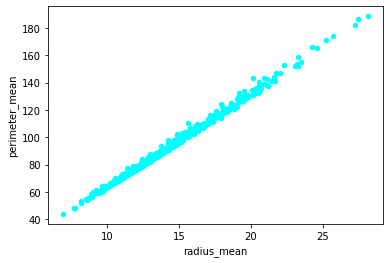

In [168]:
import matplotlib.pyplot as plot

R_M = x[:, 0]
P_M = x[:, 2]

dataFrame = pd.DataFrame(data=dataset, columns=['radius_mean','perimeter_mean']);

# Draw a scatter plot
#plt.scatter(R_M, P_M, color = 'cyan')
#plt.plot(R_M, P_M)

dataFrame.plot.scatter(x='radius_mean', y='perimeter_mean', color = 'cyan');

plot.savefig('BC_scatter_plot', transparent=True)
plot.show(block=True)

In [169]:
import numpy as np
import matplotlib.pyplot as plt

R_M = x[:, 0]
P_M = x[:, 2]

my_rho = np.corrcoef(R_M, P_M)

print(my_rho)

[[1.         0.99785528]
 [0.99785528 1.        ]]


In [170]:
#Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

In [171]:
from scipy.stats import pearsonr

pscore = pearsonr(R_M, P_M)

print(pscore)

(0.9978552814938108, 0.0)


In [172]:
from scipy.stats import spearmanr

sscore = spearmanr(R_M, P_M)

print(sscore)

SpearmanrResult(correlation=0.9978017394617466, pvalue=0.0)


## kNN algorithm

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('breast_cancer_dataset.csv')

x = dataset.iloc[:, [2,4]]
y = dataset.iloc[:, 1]

le = LabelEncoder()
y = le.fit_transform(y)

x = pd.DataFrame(x).to_numpy()
y = pd.DataFrame(y).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [174]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

C:\Users\F5331811\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [175]:
#print(classifier.predict([[9.504, 12.44]]))

In [176]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[105   3]
 [ 15  48]]


0.8947368421052632

# Question 2

In [178]:
wine = pd.read_csv('wine-composition-dataset.csv')

x = wine.iloc[:, :-1].values
y = wine.iloc[:, -1].values

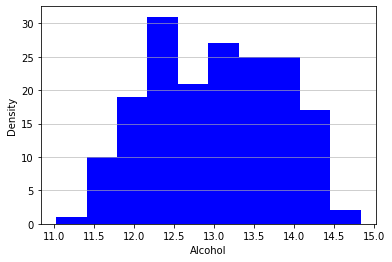

In [179]:
plt.figure()

plt.hist(x[:, 0], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Alcohol')
plt.ylabel('Density')

plt.savefig('Alcohol.png', transparent=True)
plt.show()

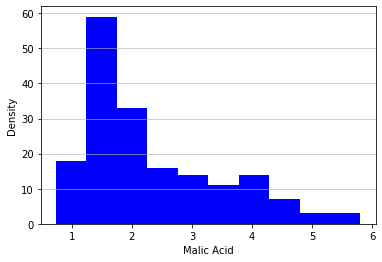

In [180]:
plt.figure()

plt.hist(x[:, 1], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Malic Acid')
plt.ylabel('Density')

plt.savefig('Malic.png', transparent=True)
plt.show()

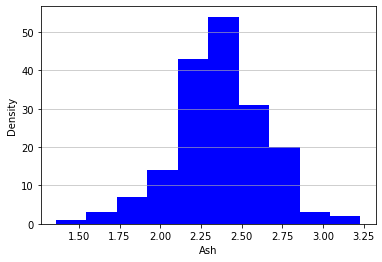

In [181]:
plt.figure()

plt.hist(x[:, 2], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ash')
plt.ylabel('Density')

plt.savefig('Ash.png', transparent=True)
plt.show()

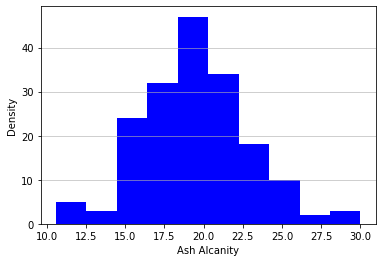

In [182]:
plt.figure()

plt.hist(x[:, 3], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ash Alcanity')
plt.ylabel('Density')

plt.savefig('Ash Al.png', transparent=True)
plt.show()

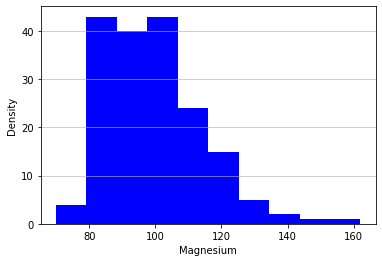

In [183]:
plt.figure()

plt.hist(x[:, 4], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Magnesium')
plt.ylabel('Density')

plt.savefig('MG.png', transparent=True)
plt.show()

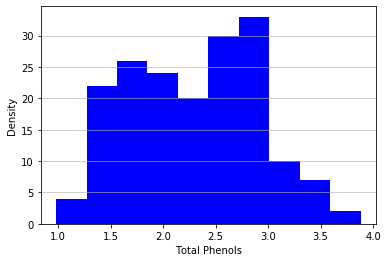

In [184]:
plt.figure()

plt.hist(x[:, 5], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Total Phenols')
plt.ylabel('Density')

plt.savefig('Phenols.png', transparent=True)
plt.show()

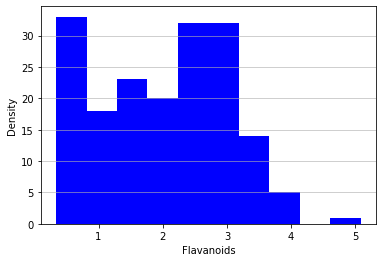

In [185]:
plt.figure()

plt.hist(x[:, 6], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Flavanoids')
plt.ylabel('Density')

plt.savefig('Flavanoids.png', transparent=True)
plt.show()

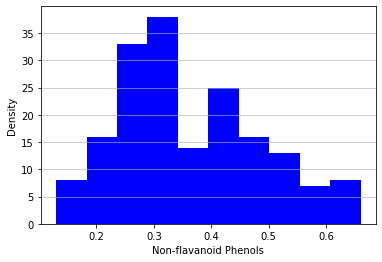

In [186]:
plt.figure()

plt.hist(x[:, 7], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Non-flavanoid Phenols')
plt.ylabel('Density')

plt.savefig('Non.png', transparent=True)
plt.show()

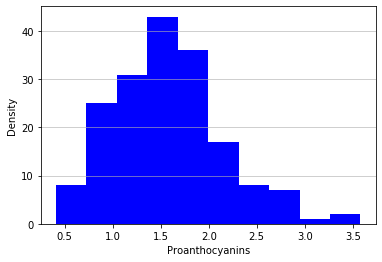

In [187]:
plt.figure()

plt.hist(x[:, 8], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Proanthocyanins')
plt.ylabel('Density')

plt.savefig('Pro.png', transparent=True)
plt.show()

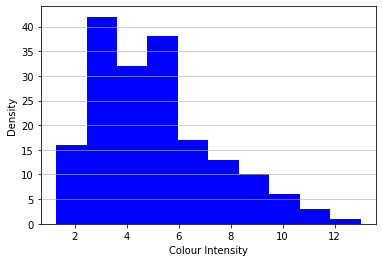

In [188]:
plt.figure()

plt.hist(x[:, 9], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Colour Intensity')
plt.ylabel('Density')

plt.savefig('Colour.png', transparent=True)
plt.show()

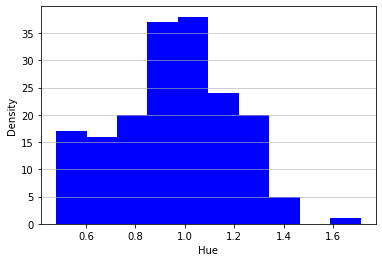

In [189]:
plt.figure()

plt.hist(x[:, 10], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Hue')
plt.ylabel('Density')

plt.savefig('Hue.png', transparent=True)
plt.show()

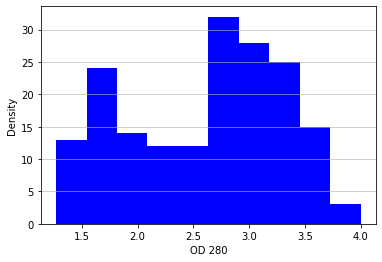

In [190]:
plt.figure()

plt.hist(x[:, 11], color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('OD 280')
plt.ylabel('Density')

plt.savefig('OD.png', transparent=True)
plt.show()

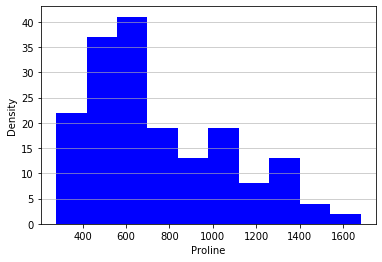

In [191]:
plt.figure()

plt.hist(y, color = 'blue')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Proline')
plt.ylabel('Density')

plt.savefig('Proline.png', transparent=True)
plt.show()

## before the elbow method

In [192]:
from sklearn.cluster import KMeans

X = wine.iloc[:, [0, 4]].values

In [193]:
kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

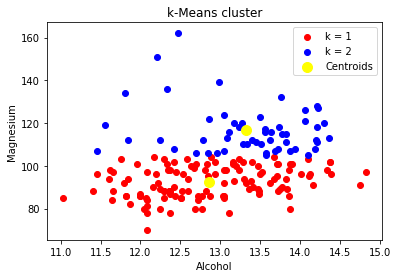

In [194]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'k = 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'k = 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('k-Means cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()
plt.savefig('k-Mean k = 2', transparent=True)
plt.show()


In [195]:
Kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

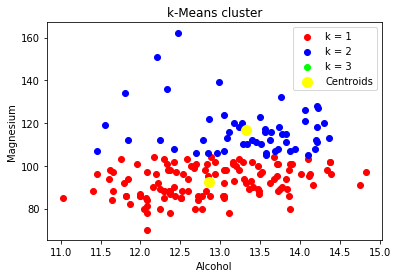

In [196]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'k = 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'k = 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'lime', label = 'k = 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('k-Means cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()
plt.savefig('k-Mean k = 3', transparent=True)
plt.show()


In [197]:
kmeans = KMeans(n_clusters = 4, init = 'random', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

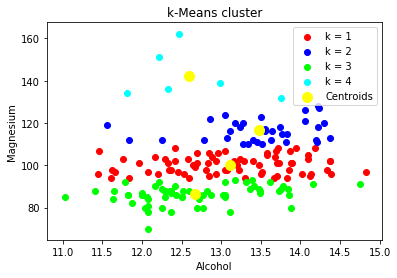

In [198]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'k = 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'k = 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'lime', label = 'k = 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'k = 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('k-Means cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()
plt.savefig('k-Mean k = 4', transparent=True)
plt.show()


In [199]:
kmeans = KMeans(n_clusters = 5, init = 'random', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

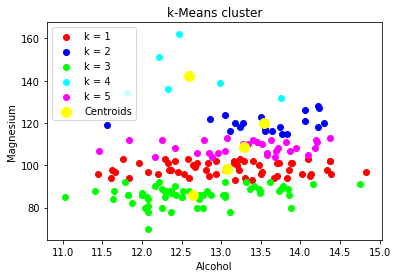

In [200]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'k = 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'k = 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'lime', label = 'k = 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'k = 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'k = 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('k-Means cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()
plt.savefig('k-Mean k = 5', transparent=True)
plt.show()


In [201]:
kmeans = KMeans(n_clusters = 6, init = 'random', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

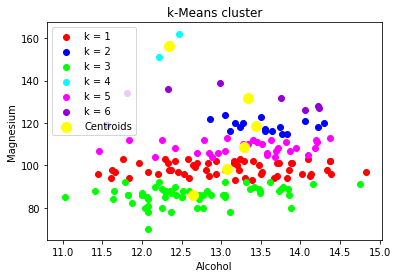

In [202]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'k = 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'k = 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'lime', label = 'k = 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'k = 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'k = 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], c = 'darkviolet', label = 'k = 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('k-Means cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()
plt.savefig('k-Mean k = 6', transparent=True)
plt.show()


In [203]:
kmeans = KMeans(n_clusters = 7, init = 'random', random_state = 40)
y_kmeans = kmeans.fit_predict(X)

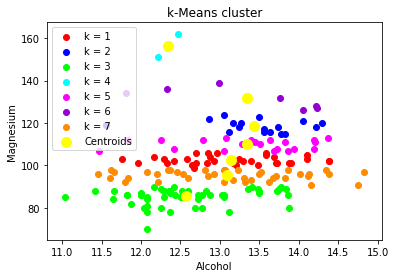

In [204]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'k = 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'k = 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'lime', label = 'k = 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'k = 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'k = 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], c = 'darkviolet', label = 'k = 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], c = 'darkorange', label = 'k = 7')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('k-Means cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')

plt.legend()

plt.savefig('k-Mean k = 7', transparent=True)
plt.show()


## Using the elbow method to find the optimal number of clusters

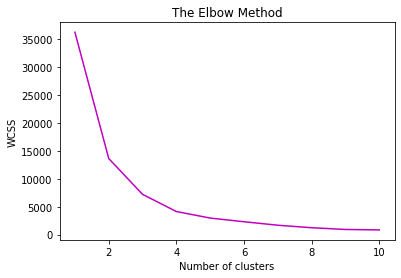

In [205]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color = "m")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow method', transparent=True)
plt.show()


## Training the K-Means model on the dataset

In [206]:
kmeans = KMeans(n_clusters = 7, init = 'random', random_state = 40)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([5, 0, 0, 4, 1, 4, 6, 1, 6, 6, 0, 6, 2, 6, 0, 4, 1, 1, 4, 1, 5, 0,
       0, 6, 6, 1, 6, 6, 4, 6, 0, 0, 0, 5, 4, 0, 4, 6, 6, 5, 1, 2, 0, 0,
       4, 4, 0, 0, 0, 4, 6, 6, 4, 1, 1, 1, 1, 0, 4, 2, 0, 0, 6, 2, 0, 6,
       2, 2, 4, 3, 0, 2, 2, 5, 0, 6, 2, 4, 5, 0, 2, 2, 2, 2, 6, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 6, 3, 5, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 6, 6,
       4, 2, 0, 2, 2, 2, 2, 4, 2, 2, 6, 1, 0, 2, 2, 2, 2, 6, 2, 2, 1, 0,
       6, 0, 2, 6, 2, 6, 2, 0, 6, 2, 6, 6, 4, 0, 2, 2, 6, 4, 1, 4, 1, 6,
       0, 6, 2, 6, 6, 2, 2, 4, 0, 0, 2, 2, 4, 2, 0, 4, 6, 2, 6, 6, 0, 1,
       1, 6])

## Visualising the cluster

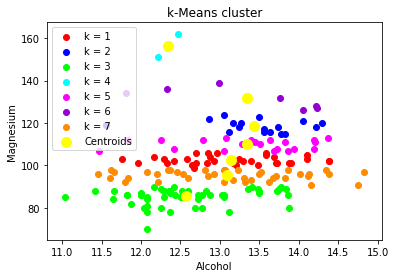

In [207]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'k = 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'k = 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'lime', label = 'k = 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'k = 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'k = 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], c = 'darkviolet', label = 'k = 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], c = 'darkorange', label = 'k = 7')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c = 'yellow', label = 'Centroids')
plt.title('k-Means cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()
plt.savefig('k-Mean 1', transparent=True)
plt.show()


# Question 3

Linear regression model

In [208]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [209]:
dataset = pd.read_csv('admission_predict.csv')

x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [211]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
y_predict = regressor.predict(x_test)
np.set_printoptions(precision=2)

In [213]:
#print(y_predict)
#print(y_test)
print(np.concatenate((y_predict.reshape(len(y_predict), 1), y_test.reshape(len(y_test), 1)), 1)) #, error.reshape(len(error),1)), 1))

[[0.7  0.71]
 [0.69 0.7 ]
 [0.78 0.79]
 [0.62 0.73]
 [0.72 0.72]
 [0.6  0.48]
 [0.71 0.77]
 [0.64 0.71]
 [0.87 0.9 ]
 [0.92 0.94]
 [0.54 0.58]
 [0.89 0.89]
 [0.71 0.72]
 [0.46 0.57]
 [0.85 0.78]
 [0.62 0.42]
 [0.63 0.64]
 [0.81 0.84]
 [0.58 0.63]
 [0.73 0.72]
 [0.88 0.9 ]
 [0.84 0.83]
 [0.66 0.57]
 [0.46 0.47]
 [0.78 0.85]
 [0.58 0.67]
 [0.5  0.44]
 [0.64 0.54]
 [0.89 0.92]
 [0.65 0.62]
 [0.64 0.68]
 [0.74 0.73]
 [0.74 0.73]
 [0.56 0.61]
 [0.78 0.55]
 [0.77 0.74]
 [0.65 0.64]
 [0.86 0.89]
 [0.63 0.73]
 [0.93 0.95]
 [0.73 0.71]
 [0.67 0.72]
 [0.71 0.75]
 [0.81 0.76]
 [0.82 0.86]
 [0.65 0.7 ]
 [0.56 0.39]
 [0.69 0.79]
 [0.61 0.61]
 [0.6  0.64]
 [0.68 0.71]
 [0.8  0.8 ]
 [0.65 0.61]
 [0.88 0.89]
 [0.72 0.68]
 [0.75 0.79]
 [0.71 0.78]
 [0.73 0.52]
 [0.76 0.76]
 [0.83 0.88]
 [0.77 0.74]
 [0.47 0.49]
 [0.64 0.65]
 [0.52 0.59]
 [0.84 0.87]
 [0.82 0.89]
 [0.74 0.81]
 [0.87 0.9 ]
 [0.77 0.8 ]
 [0.75 0.76]
 [0.6  0.68]
 [0.83 0.87]
 [0.83 0.68]
 [0.61 0.64]
 [0.93 0.91]
 [0.63 0.61]
 [0.64 0.69]

In [214]:
error = y_predict-y_test
print(error.reshape(len(error),1))

[[-0.01]
 [-0.01]
 [-0.01]
 [-0.11]
 [ 0.  ]
 [ 0.12]
 [-0.06]
 [-0.07]
 [-0.03]
 [-0.02]
 [-0.04]
 [-0.  ]
 [-0.01]
 [-0.11]
 [ 0.07]
 [ 0.2 ]
 [-0.01]
 [-0.03]
 [-0.05]
 [ 0.01]
 [-0.02]
 [ 0.01]
 [ 0.09]
 [-0.01]
 [-0.07]
 [-0.09]
 [ 0.06]
 [ 0.1 ]
 [-0.03]
 [ 0.03]
 [-0.04]
 [ 0.01]
 [ 0.01]
 [-0.05]
 [ 0.23]
 [ 0.03]
 [ 0.01]
 [-0.03]
 [-0.1 ]
 [-0.02]
 [ 0.02]
 [-0.05]
 [-0.04]
 [ 0.05]
 [-0.04]
 [-0.05]
 [ 0.17]
 [-0.1 ]
 [-0.  ]
 [-0.04]
 [-0.03]
 [ 0.  ]
 [ 0.04]
 [-0.01]
 [ 0.04]
 [-0.04]
 [-0.07]
 [ 0.21]
 [-0.  ]
 [-0.05]
 [ 0.03]
 [-0.02]
 [-0.01]
 [-0.07]
 [-0.03]
 [-0.07]
 [-0.07]
 [-0.03]
 [-0.03]
 [-0.01]
 [-0.08]
 [-0.04]
 [ 0.15]
 [-0.03]
 [ 0.02]
 [ 0.02]
 [-0.05]
 [ 0.03]
 [-0.02]
 [ 0.08]]


In [215]:
print(regressor.predict([[322, 109, 5, 4.5, 3.5, 8.80, 0]]))

[0.76]


In [216]:
print(regressor.predict([[307, 52, 5, 4.4, 3.5, 8.20, 2]]))

[0.59]


In [217]:
print(regressor.coef_)
print(regressor.intercept_)

[ 0.    0.    0.01 -0.    0.02  0.12  0.02]
-1.304713830082413


In [218]:
regressor.coef_[0]

0.0020712765037326996

# Question 4

80% training set 20% testing set

kNN use k = 3

use Gaussian Naive Bayes

Classification not regression - predicting labels not values

In [219]:
dataset = pd.read_csv('iris_dataset.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## kNN

In [221]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [248]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [249]:
print(classifier.predict(sc.transform([[6, 2.9, 4.5, 1.5]])))

['versicolor']


In [250]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']]


In [251]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'micro'))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'macro'))
print(recall_score(y_test, y_pred, average = 'micro'))
print(recall_score(y_test, y_pred, average = 'weighted'))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
0.9666666666666667
0.9761904761904763
0.9666666666666667
0.9690476190476189
0.9444444444444445
0.9666666666666667
0.9666666666666667


In [252]:
dataset = pd.read_csv('iris_dataset.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##  Naive Bayes

In [254]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [229]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [230]:
print(classifier.predict(sc.transform([[6, 2.9, 4.5, 1.5]])))

['versicolor']


In [231]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']]


In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


0.9666666666666667

In [233]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'micro'))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'macro'))
print(recall_score(y_test, y_pred, average = 'micro'))
print(recall_score(y_test, y_pred, average = 'weighted'))

0.9666666666666667
0.9761904761904763
0.9666666666666667
0.9690476190476189
0.9444444444444445
0.9666666666666667
0.9666666666666667


In [242]:
dataset = pd.read_csv('iris_dataset.csv')

X = dataset.iloc[:, [0,1,2,3]].values
y = dataset.iloc[:, -1].values

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Decision Trees 

In [244]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [245]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [246]:
print(classifier.predict(sc.transform([[6, 2.9, 4.5, 1.5]])))

['versicolor']


In [247]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']]


In [240]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


1.0

In [241]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'macro'))
print(precision_score(y_test, y_pred, average = 'micro'))
print(precision_score(y_test, y_pred, average = 'weighted'))
print(recall_score(y_test, y_pred, average = 'macro'))
print(recall_score(y_test, y_pred, average = 'micro'))
print(recall_score(y_test, y_pred, average = 'weighted'))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
